# Comparing clustering across two datasets (hemibrain v Flywire)

In [31]:
import pandas as pd
import numpy as np

### Importing flywire modularity

In [32]:
# Import clustering result
clustering0 = pd.read_csv('clustering_result.txt', sep=' ', header=None)
clustering005 = pd.read_csv('clustering_result005.txt', sep=' ', header=None)
#clustering01 = pd.read_csv('clustering_result01.txt', sep=' ', header=None)
clustering0.rename(columns={0: 'id', 1: '0.0'}, inplace=True)
clustering005.rename(columns={0: 'id', 1: '0.05'}, inplace=True)
clustering0

,id,0.0
0,720575940602703072,1
1,720575940603201452,2
2,720575940603693158,3
3,720575940603715296,4
4,720575940603751857,3
...,...,...
1542,720575940654676385,1
1543,720575940655011489,5
1544,720575940658554753,4
1545,720575940659170433,3


In [33]:
# Merge the two clustering results
fw_mod = pd.merge(clustering0, clustering005, on='id')
fw_mod

,id,0.0,0.05
0,720575940602703072,1,1
1,720575940603201452,2,2
2,720575940603693158,3,3
3,720575940603715296,4,4
4,720575940603751857,3,3
...,...,...,...
1542,720575940654676385,1,5
1543,720575940655011489,5,6
1544,720575940658554753,4,4
1545,720575940659170433,3,3


### Importing Hemibrain modularity

In [35]:
hemi_mod = pd.read_csv('/Users/rweberla/Documents/Github/oviIN-inputs/modularity_runs/0.0/0-0_98765.txt', sep=' ', header=None)
hemi_mod = hemi_mod.rename(columns={0: 'id', 1: '0.0'})
hemi_mod

,id,0.0
0,1003215282,1
1,1005952640,2
2,1006928515,3
3,1007260806,3
4,1008024276,4
...,...,...
1827,987117151,2
1828,987273073,6
1829,988567837,5
1830,988909130,5


## How do the cluster sizes compare??
This means also looking at what cluster things are in to make sure im comparing the right things

### Checking where the top connections are clustered

In [5]:
# import celltypes
celltypes = pd.read_csv('consolidated_cell_types.csv.gz', compression='gzip')
connections = pd.read_csv('/Users/rweberla/E-I-motifs/data/connections_princeton_no_threshold.csv')

# oviIN id
ovi_fw = 720575940625741287
celltypes

,root_id,primary_type,additional_type(s)
0,720575940596125868,T5c,NaN
1,720575940597856265,Tm16,NaN
2,720575940597944841,Tm7,CB3851
3,720575940598267657,TmY15,NaN
4,720575940599333574,Tm1,NaN
...,...,...,...
137672,720575940661335681,CB0180,NaN
137673,720575940661336193,TmY3,NaN
137674,720575940661337217,KCab-p,NaN
137675,720575940661338497,CB0904,NaN


In [6]:
conns_fw_ovi_pre = connections[connections['post_pt_root_id'] == ovi_fw]
conns_fw_ovi_pre

,pre_pt_root_id,post_pt_root_id,neuropil,syn_count,nt_type
744126,720575940612090866,720575940625741287,SMP_L,1,ACH
754254,720575940626463869,720575940625741287,SMP_R,2,GLUT
757310,720575940625470526,720575940625741287,SMP_R,9,ACH
758467,720575940625263802,720575940625741287,SMP_L,1,ACH
763376,720575940613635737,720575940625741287,SMP_R,3,OCT
...,...,...,...,...,...
22678226,720575940616434617,720575940625741287,SMP_R,1,ACH
22684032,720575940623905719,720575940625741287,SMP_R,4,ACH
22685011,720575940637079407,720575940625741287,CRE_R,4,GLUT
22687192,720575940624273957,720575940625741287,CRE_R,6,GABA


In [7]:
conns_fw_ovi_pre['neuropil'].unique()

array(['SMP_L', 'SMP_R', 'IB_L', 'LAL_R', 'SPS_R', 'CRE_R', 'CAN_R',
       'IB_R', 'VES_R', 'FLA_R', 'SAD', 'CRE_L', 'MB_ML_R', 'MB_VL_L',
       'ATL_R', 'AL_R', 'GNG', 'FB', 'MB_VL_R'], dtype=object)

In [8]:
conns_fw_ovi = conns_fw_ovi_pre[['pre_pt_root_id', 'post_pt_root_id', 'syn_count']].reset_index(drop=True)
conns_fw_ovi = conns_fw_ovi.groupby(['pre_pt_root_id', 'post_pt_root_id']).sum().reset_index()
conns_fw_ovi

,pre_pt_root_id,post_pt_root_id,syn_count
0,720575940602703072,720575940625741287,11
1,720575940603201452,720575940625741287,19
2,720575940603693158,720575940625741287,2
3,720575940603715296,720575940625741287,1
4,720575940603751857,720575940625741287,2
...,...,...,...
1543,720575940654676385,720575940625741287,2
1544,720575940655011489,720575940625741287,21
1545,720575940658554753,720575940625741287,1
1546,720575940659170433,720575940625741287,5


In [9]:
# threshold
conns_fw_ovi = conns_fw_ovi[conns_fw_ovi['syn_count'] >= 5]
conns_fw_ovi


,pre_pt_root_id,post_pt_root_id,syn_count
0,720575940602703072,720575940625741287,11
1,720575940603201452,720575940625741287,19
9,720575940604088288,720575940625741287,6
17,720575940605158065,720575940625741287,10
19,720575940605226673,720575940625741287,5
...,...,...,...
1525,720575940647079715,720575940625741287,8
1529,720575940648397177,720575940625741287,6
1535,720575940651928566,720575940625741287,30
1544,720575940655011489,720575940625741287,21


In [10]:
# sort
conns_sorted = conns_fw_ovi.sort_values(by='syn_count', ascending=False)
conns_sorted

,pre_pt_root_id,post_pt_root_id,syn_count
1259,720575940633705636,720575940625741287,154
574,720575940622219190,720575940625741287,143
1309,720575940635515744,720575940625741287,123
458,720575940619940693,720575940625741287,82
209,720575940613992657,720575940625741287,74
...,...,...,...
560,720575940621904823,720575940625741287,5
114,720575940611443941,720575940625741287,5
739,720575940624799490,720575940625741287,5
859,720575940626806046,720575940625741287,5


In [11]:
# attach cell types
conns_sorted_type = conns_sorted.merge(celltypes[['root_id', 'primary_type']], left_on='pre_pt_root_id', right_on='root_id', how='left')
conns_sorted_type_mod = conns_sorted_type.merge(fw_mod, left_on='pre_pt_root_id', right_on='id', how='left')
conns_sorted_type_mod

,pre_pt_root_id,post_pt_root_id,syn_count,root_id,primary_type,id,0.0,0.05
0,720575940633705636,720575940625741287,154,7.205759e+17,SMP544,720575940633705636,2,2
1,720575940622219190,720575940625741287,143,7.205759e+17,SMP544,720575940622219190,2,2
2,720575940635515744,720575940625741287,123,7.205759e+17,SMP550,720575940635515744,3,3
3,720575940619940693,720575940625741287,82,7.205759e+17,SMP237,720575940619940693,4,1
4,720575940613992657,720575940625741287,74,7.205759e+17,SMP383,720575940613992657,1,1
...,...,...,...,...,...,...,...,...
300,720575940621904823,720575940625741287,5,7.205759e+17,SMP521,720575940621904823,1,5
301,720575940611443941,720575940625741287,5,7.205759e+17,FS1A,720575940611443941,4,4
302,720575940624799490,720575940625741287,5,7.205759e+17,CB3379,720575940624799490,4,4
303,720575940626806046,720575940625741287,5,7.205759e+17,DNpe039,720575940626806046,2,2


In [12]:
conns_sorted_type_mod = conns_sorted_type_mod[['primary_type', 'syn_count', '0.0']].groupby(['primary_type', '0.0']).sum().reset_index()
final_conns = conns_sorted_type_mod.sort_values(by='syn_count', ascending=False)
final_conns

,primary_type,0.0,syn_count
203,SMP544,2,321
90,FS1A,4,143
186,SMP383,1,127
204,SMP550,3,123
28,CB1025,3,118
...,...,...,...
150,SMP160,1,5
78,CL318,2,5
77,CL212,2,5
75,CL008,1,5


In [13]:
conns_top = conns_sorted_type_mod[['primary_type', 'syn_count']].groupby(['primary_type']).sum().sort_values(by='syn_count', ascending=False).reset_index()
conns_top = conns_top[conns_top['syn_count'] >= 35]['primary_type'].tolist()
conns_top

['SMP544',
 'SMP550',
 'FS1A',
 'SMP383',
 'CB1025',
 'SMP237',
 'SMP516b',
 'IB017',
 'SMP189',
 'CB2413',
 'SLPpm3_H01',
 'CB0746',
 'LAL193',
 'SMP516a',
 'CB1514',
 'CB3470',
 'SMP555',
 'SMP339',
 'PS202',
 'LAL182',
 'CB3462',
 'SMP003',
 'SMP567',
 'CB2993',
 'CB3509',
 'AN_multi_88',
 'CRE075',
 'SMP240',
 'CB0107',
 'SMP357',
 'SMP566a',
 'SMP051',
 'SMP422',
 'CB2123']

In [14]:
# pivot
ovi_in_pivoted = final_conns.pivot(index='primary_type', columns='0.0', values='syn_count')

# check for the top cell types only
ovi_in_pivot_top = ovi_in_pivoted.loc[conns_top]
ovi_in_pivot_top

0.0,1,2,3,4,5
primary_type,,,,,
SMP544,NaN,321.0,NaN,NaN,NaN
SMP550,NaN,NaN,123.0,NaN,43.0
FS1A,NaN,NaN,NaN,143.0,NaN
SMP383,127.0,NaN,NaN,NaN,NaN
CB1025,NaN,NaN,118.0,NaN,NaN
SMP237,NaN,NaN,NaN,82.0,15.0
SMP516b,89.0,NaN,NaN,NaN,NaN
IB017,NaN,NaN,NaN,86.0,NaN
SMP189,NaN,NaN,NaN,50.0,28.0


In [15]:
ovi_in_pivot_top['total'] = ovi_in_pivot_top.sum(axis=1)
ovi_in_pivot_top

0.0,1,2,3,4,5,total
primary_type,,,,,,
SMP544,NaN,321.0,NaN,NaN,NaN,321.0
SMP550,NaN,NaN,123.0,NaN,43.0,166.0
FS1A,NaN,NaN,NaN,143.0,NaN,143.0
SMP383,127.0,NaN,NaN,NaN,NaN,127.0
CB1025,NaN,NaN,118.0,NaN,NaN,118.0
SMP237,NaN,NaN,NaN,82.0,15.0,97.0
SMP516b,89.0,NaN,NaN,NaN,NaN,89.0
IB017,NaN,NaN,NaN,86.0,NaN,86.0
SMP189,NaN,NaN,NaN,50.0,28.0,78.0


In [16]:
# sorting the table for the highest total 
ovi_in_pivot_sorted = ovi_in_pivot_top.sort_values(by='total', ascending=False)
ovi_in_pivot_sorted = ovi_in_pivot_sorted.drop(columns='total')

In [17]:
# plotting colors from the hemibrain plotting
colors = ['#4e90d3', '#9467bd', '#e7cf57', '#ff6a88', '#5cc9ff', '#3a9f82', '#9fad2b']

In [18]:
ovi_in_pivot_sorted.columns = range(0, ovi_in_pivot_sorted.shape[1])
ovi_in_pivot_sorted = ovi_in_pivot_sorted.reset_index().fillna(0)
ovi_in_pivot_sorted

,primary_type,0,1,2,3,4
0,SMP544,0.0,321.0,0.0,0.0,0.0
1,SMP550,0.0,0.0,123.0,0.0,43.0
2,FS1A,0.0,0.0,0.0,143.0,0.0
3,SMP383,127.0,0.0,0.0,0.0,0.0
4,CB1025,0.0,0.0,118.0,0.0,0.0
5,SMP237,0.0,0.0,0.0,82.0,15.0
6,SMP516b,89.0,0.0,0.0,0.0,0.0
7,IB017,0.0,0.0,0.0,86.0,0.0
8,SMP189,0.0,0.0,0.0,50.0,28.0
9,CB2413,77.0,0.0,0.0,0.0,0.0


### Top inputs clustered

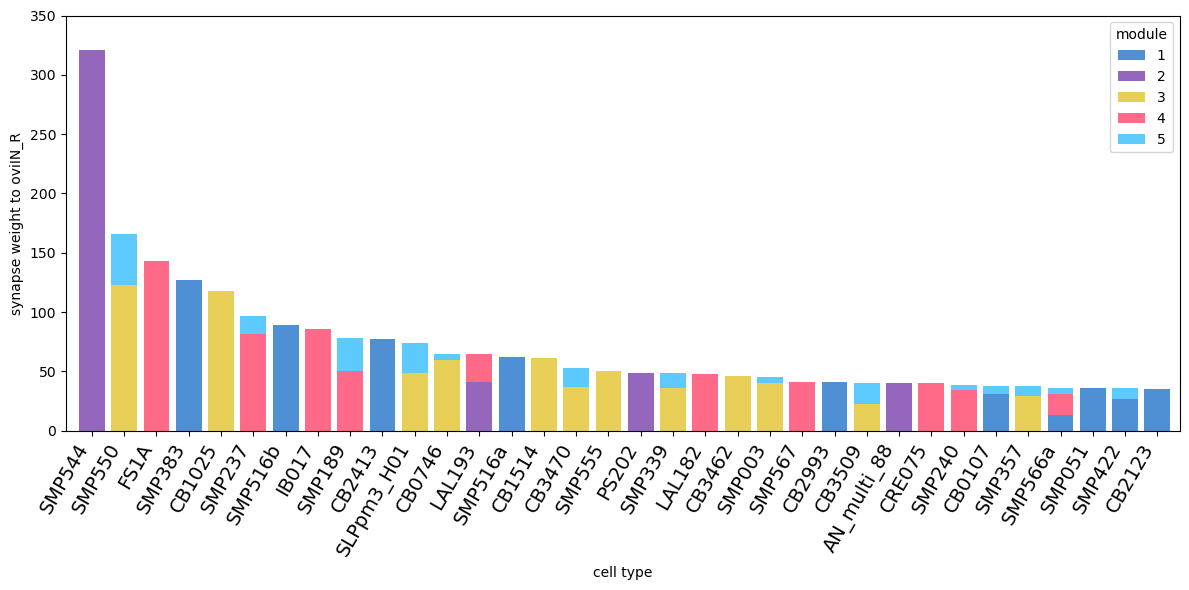

In [30]:
# plot the top 30 cell types
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(5):
    ax.bar(ovi_in_pivot_sorted['primary_type'], 
           ovi_in_pivot_sorted[i], 
           bottom=np.sum(ovi_in_pivot_sorted.values[:,1:i+1], axis=1), 
           label=i+1, 
           color=colors[i])

plt.xlabel('cell type')
plt.ylabel('synapse weight to oviIN_R')
# get rid of padding to left and right of xtcks
plt.xlim(-0.8, len(ovi_in_pivot_sorted.index)-0.3)

plt.ylim(0, 350)
plt.legend(title='module', loc='upper right')
plt.xticks(rotation=60, ha='right', fontsize=14)

plt.tight_layout()
fig.tight_layout()

## Comparing sizes of clusters

In [36]:
# Printing out cluster size for each module
cluster_sizes = fw_mod['0.0'].value_counts().sort_index()
for module, size in cluster_sizes.items():
    print(f"Module {module}: {size} neurons")

Module 1: 242 neurons
Module 2: 328 neurons
Module 3: 239 neurons
Module 4: 456 neurons
Module 5: 282 neurons
